<H1> Assignment 12</H1> 
<H3> Author: Shreya Kapoor </H3> 

<img src = 'vae.png'> 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import hyperopt as hp

In [3]:
import argparse
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2

In [4]:
import numpy as np
import glob
import os 
import tensorflow as tf
tf.keras.backend.clear_session()

In [5]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Model
import seaborn as sns
from tensorflow.keras import backend as K

In [6]:
from tensorflow.keras.callbacks import TensorBoard

In [7]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda,Activation, Dense, Dropout
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.optimizers import Adam
import numpy as np
import time
import sys
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2

In [8]:
path = "../Assignment_7"

In [9]:
for file in glob.glob(os.path.join(path, '*.csv')): 
    print (file)
    if 'leukemia_small.csv' in file : 
        df = pd.read_csv(file)

../Assignment_7/leukemia_small.csv


In [10]:
df.head()

,ALL,ALL.1,ALL.2,ALL.3,ALL.4,ALL.5,ALL.6,ALL.7,ALL.8,ALL.9,...,AML.21,AML.22,AML.23,AML.24,ALL.41,ALL.42,ALL.43,ALL.44,ALL.45,ALL.46
0,0.561549,-0.623141,-0.814524,0.229492,-0.706016,-0.314779,-0.089514,-0.623685,-0.816460,2.043910,...,-0.807725,-0.940462,-0.207155,0.062535,-0.294149,-0.047172,-0.812292,0.013516,-0.353390,-0.525819
1,0.213566,-0.912107,-1.084069,-0.965719,0.660884,0.541182,-0.916502,-0.912595,1.564484,0.449957,...,-1.077961,-0.429690,-0.538333,-0.296009,0.684703,2.642169,-1.082064,1.817207,0.063489,1.362307
2,-0.636584,-0.465296,-0.583127,-0.525060,-0.548306,-0.156431,-0.470195,-0.465841,-0.658930,-0.141057,...,-0.650181,-0.783134,-0.048632,0.221498,-0.135767,-0.524362,2.774872,0.172399,-0.195105,-0.367815
3,0.347124,-0.734345,1.785912,-0.188016,-0.702840,0.446234,-1.026895,0.860892,-0.275779,0.194809,...,-0.056816,-1.346795,-0.595956,-0.319818,1.010086,0.081749,2.208582,0.429806,-0.101432,-0.922238
4,0.545509,-0.539898,1.445064,-0.534603,-0.285707,-0.204271,-0.634511,0.077930,0.127314,0.507366,...,-0.015337,-0.664693,-0.936764,-0.345593,1.384282,0.169043,1.540095,-0.508952,0.414814,-0.900327


In [11]:
#rows are genes 
#columns are denoting the class labels

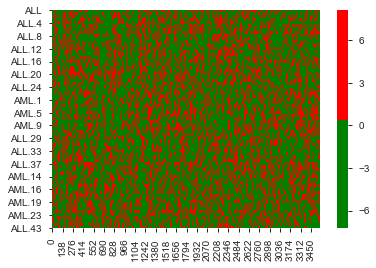

In [12]:
sns.heatmap(df.transpose() , cmap = ['green', 'red'])
#heatmap is N genes x M samples

In [13]:
df = df.transpose() 

In [14]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [15]:
df = normalize(df)

In [16]:
len(df.columns)

3571

In [17]:
df.loc['ALL']

0       0.379608
1       0.355022
2       0.045438
3       0.308768
4       0.519043
          ...   
3566    0.549605
3567    0.365494
3568    0.683416
3569    0.518961
3570    0.166539
Name: ALL, Length: 3571, dtype: float64

In [18]:
df.index

Index(['ALL', 'ALL.1', 'ALL.2', 'ALL.3', 'ALL.4', 'ALL.5', 'ALL.6', 'ALL.7',
       'ALL.8', 'ALL.9', 'ALL.10', 'ALL.11', 'ALL.12', 'ALL.13', 'ALL.14',
       'ALL.15', 'ALL.16', 'ALL.17', 'ALL.18', 'ALL.19', 'ALL.20', 'ALL.21',
       'ALL.22', 'ALL.23', 'ALL.24', 'ALL.25', 'ALL.26', 'AML', 'AML.1',
       'AML.2', 'AML.3', 'AML.4', 'AML.5', 'AML.6', 'AML.7', 'AML.8', 'AML.9',
       'AML.10', 'ALL.27', 'ALL.28', 'ALL.29', 'ALL.30', 'ALL.31', 'ALL.32',
       'ALL.33', 'ALL.34', 'ALL.35', 'ALL.36', 'ALL.37', 'AML.11', 'AML.12',
       'AML.13', 'AML.14', 'AML.15', 'ALL.38', 'ALL.39', 'AML.16', 'AML.17',
       'ALL.40', 'AML.18', 'AML.19', 'AML.20', 'AML.21', 'AML.22', 'AML.23',
       'AML.24', 'ALL.41', 'ALL.42', 'ALL.43', 'ALL.44', 'ALL.45', 'ALL.46'],
      dtype='object')

In [19]:
df['cell'] = [1 if 'ALL' in index else 0 for index in df.index]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cell']), df['cell'], test_size = 0.5)

In [21]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570
ALL.41,0.171911,0.480145,0.132594,0.429613,0.679151,0.077902,0.067655,0.072114,0.810043,0.860071,...,0.319141,0.540040,0.492849,0.165778,0.721853,0.641167,0.298006,0.565311,0.080468,0.057799
AML.4,0.055758,0.279189,0.049179,0.105438,0.363259,0.699271,0.524703,0.502130,0.796716,0.768986,...,0.439880,0.649356,0.649781,0.265335,0.372481,0.770557,0.389739,0.804360,0.442440,0.284625
ALL.19,0.486691,0.595158,0.000000,0.465977,0.784149,0.000000,0.000000,0.000000,0.638215,0.644600,...,0.493681,0.393890,0.491594,0.470513,0.578829,0.663689,0.110082,0.737935,0.286913,0.365360
ALL.44,0.246588,0.780910,0.186223,0.323840,0.317763,0.907965,0.783196,0.927918,0.896018,0.918422,...,0.528204,0.232596,0.144385,0.367334,0.648269,0.545992,0.357324,0.524020,0.425090,0.264729
ALL.3,0.299010,0.041833,0.064846,0.211223,0.312866,0.721620,0.588737,0.649029,0.838058,0.800412,...,0.586119,0.166657,0.633390,0.504654,0.430792,0.776139,0.139927,0.627271,0.239517,0.067942


## According to the task described by the exercise!

In [22]:
# for batch normalisation we set the use_bias flag to false!

In [23]:
# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.

    # Arguments
        args (tensor): mean and log of variance of Q(z|X)

    # Returns
        z (tensor): sampled latent vector
    """
    #print(args)
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


n = number of units 

In [24]:
n = len(X_train.columns)

In [25]:
n

3571

In [26]:
inputs = Input(shape=(n,), name = 'encoder_input')
x = Dense(n//2, activation = 'tanh', bias_regularizer=l2(0.01)) (inputs)
x = BatchNormalization()(x)
x = Dense(n//4, activation = 'tanh', bias_regularizer=l2(0.01)) (x)
x = BatchNormalization() (x)
z_mean = Dense(2, activation = 'tanh', name = 'z_mean') (x)
z_log_var = Dense(2, activation = 'tanh', name ='z_log_var_1' )(x)

z = Lambda(sampling, output_shape = (2,), name = 'z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name = 'encoder')
encoder.summary() 

latent_inputs = Input(shape = (2,), name ='z_sampling')
x = Dense(n//4, activation ='tanh', bias_regularizer=l2(0.01))(latent_inputs)
x = BatchNormalization()(x)
x = Dense(n//2, activation = 'tanh', bias_regularizer=l2(0.01)) (x)
X = BatchNormalization()(x)
outputs = Dense(n ,activation = 'tanh') (x)
decoder = Model(latent_inputs, outputs, name = 'decoder')
decoder.summary()

outputs = decoder(encoder(inputs)[2]) # second layer of the encoder becomes the input of the encoder
vae = Model(inputs, outputs, name = 'variational_Autoencoder')


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 3571)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1785)         6376020     encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1785)         7140        dense[0][0]                      
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 892)          1593112     batch_normalization[0][0]        
____________________________________________________________________________________________

In [27]:
vae.compile(loss = 'mse', optimizer='adam')

In [28]:
tensorboard_callback = TensorBoard(log_dir="./logs")

In [29]:
vae.fit(np.array(X_train), np.array(X_train), 
                epochs=200,
                validation_data=(np.array(X_test), np.array(X_test)), verbose = 0, 
       callbacks = [tensorboard_callback])

In [30]:
!tensorboard --logdir=./logs

W0120 09:24:05.626245 123145382625280 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.0.2 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [31]:
z_mean, zlog, z = encoder.predict(np.array(X_test),
                                   batch_size=10)

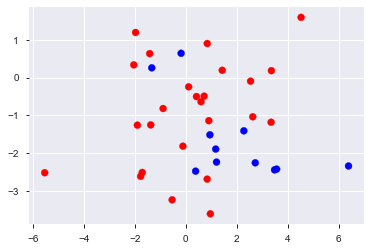

In [32]:
color_dict = {1: 'red', 0:'blue'}
colors = np.vectorize(color_dict.get)(y_test)
plt.scatter([x[0] for x in z], [x[1] for x in z], c =colors)

In [33]:
X_test_pred = vae.predict(np.array(X_test))

In [34]:
results = vae.evaluate( X_test_pred,np.array(X_test) )

36/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [36]:
#MSE
s = 0 
for i in range(len(X_test)): 
    s+= sum((np.array(X_test)[i] - X_test_pred[i])**2)**0.5 
print (s/len(X_test))


14.281316580587267


<img src = 'modelinfo.png'> 